# II. End to End Machine Learning Project

Follow along!! This is as basic stuff as it gets. A nice refresher on basic pandas manipulation, and how to conduct a ML project.

The goal here is to predict the median house value of each block in California, based on data available regarding the housing in the state. 

The dataset used is the **California Housing Prices** from StatLib.

### Setup

#### Downloading the data

Download the ``housing.tgz`` file from the data repo.

In [29]:
from pathlib import Path
import pandas as pd
import tarfile

def load_housing_data():
    tarball_path = Path("../data/housing/housing.tgz")
    with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="../data/")
    return pd.read_csv(Path("../data/housing/housing.csv"))

housing = load_housing_data()

#### Formatting the graphs

If some of the graphs don't display beautifully, change some values accordingly.

In [30]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

## Exploratory Data Analysis

### First steps

Gotta start with the most basic views. First, a quick glance at the dataframe's head (you could look at the tail if you're edgy)

In [31]:
display(housing.head())
# display(housing.tail())


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


We get an idea of how the DataFrame looks like. To have a more rigorous display, use ``info()``:

In [32]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


First is described how many entries are in the DataFrame (as well as how they are indexed). Then, every column has its name detailed, along with its non-null values count, and its data type.
For instance, `longitude` is a numerical variable with no missing value, whereas `ocean_proximity` is a categorical variable. 

It seems that `total_bedrooms` is the only variable that contains missing entries. There are multiple ways to show this.

In [33]:
print(housing.isna().sum())
print(f"housing has {housing.isna().sum().sum()} missing values, housing.total_bedrooms has {housing.total_bedrooms.isna().sum()} missing values")

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
housing has 207 missing values, housing.total_bedrooms has 207 missing values


We'll deal with these missing values later. For now let's continue the EDA. For numerical variables, the ``describe()`` method yields the basic statistics associated:

In [34]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Looking back on `ocean_proximity` (the only categorical variable here), we can do a ``value_counts()`` to check its categories.

In [35]:
housing.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Continuing with the numerical variables, we can plot each histogram with ``hist()``:

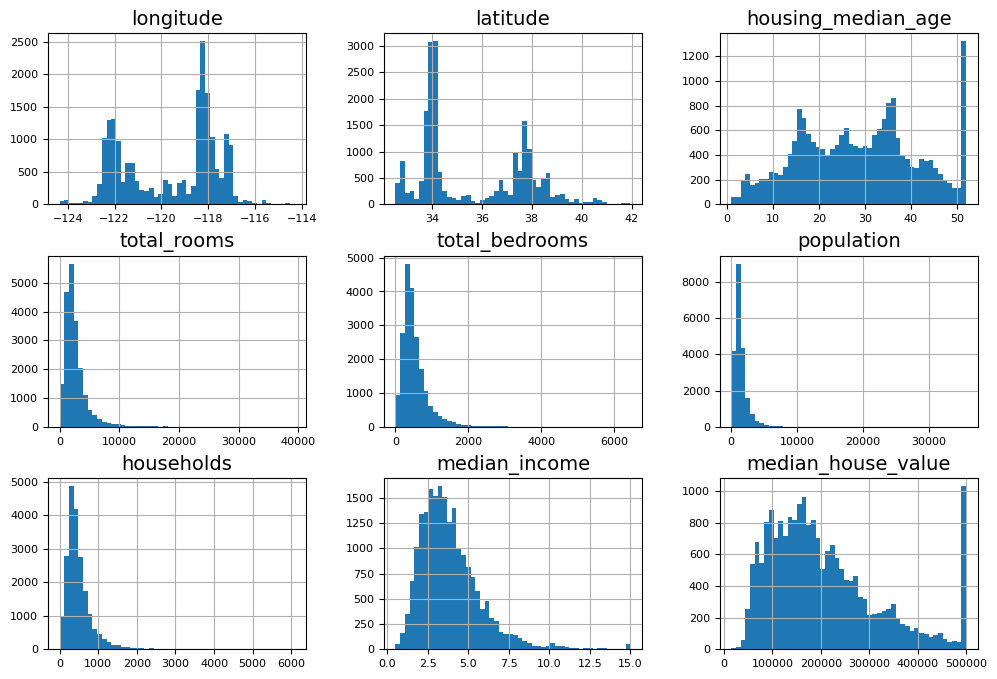

In [36]:
housing.hist(bins = 50, figsize = (12, 8)) # Can play around with the number of bins
plt.show()

Things to notice: 

* ``median_income``'s unit is most likely (*spoiler: it is*) 10 000 USD per year. It is capped at 0.5k (resp. 15k) for the lowest (resp. highest) median incomes.
* ``housing_median_age`` and ``median_house_value`` have also been capped. This is an issue since it affects our target variable. 
* The scales vary drastically. 
* Some distributions are highly asymmetrical $-$ we'd like to transform them into bell curves.

### Creating a Test Set

#### Creating it by ourselves (optional)

Let's first build it using ``numpy``:

In [37]:
import numpy as np

def split_train_test(data, test_ratio = 0.2): 
    shuffled_idx = np.random.permutation(len(data))
    test_size = int(len(data) * test_ratio)
    test_idx  = shuffled_idx[:test_size]
    train_idx = shuffled_idx[test_size:]
    return data.iloc[train_idx], data.iloc[test_idx]

In [38]:
train_set, test_set = split_train_test(housing, 0.2)
print(f"Total set size: {len(housing)}    Train set size: {len(train_set)}    Test set size: {len(test_set)}")

Total set size: 20640    Train set size: 16512    Test set size: 4128


Not optimal though, since running the cell yields a different test set each time. To address this issue, we could use a hash function that remains stable during each execution:

In [39]:
from zlib import crc32

def test_set_check(id, test_ratio):
    return crc32(np.int64(id)) < test_ratio * 2**32

def split_train_test_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda x: test_set_check(x, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [40]:
housing_with_id = housing.reset_index() # housing doesn't have an index column so we have to add it manually
train_set, test_set = split_train_test_id_hash(housing_with_id, 0.2, "index")
print(f"Total set size: {len(housing_with_id)}    Train set size: {len(train_set)}    Test set size: {len(test_set)}")

Total set size: 20640    Train set size: 16512    Test set size: 4128


Using the default index as an identifier is a great start, but it lacks robustness. We could construct an ID off stable, existing columns such as longitude and latitude, ensuring uniqueness:

In [41]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_id_hash(housing_with_id, 0.2, "id")
print(f"Total set size: {len(housing_with_id)}    Train set size: {len(train_set)}    Test set size: {len(test_set)}")

Total set size: 20640    Train set size: 16322    Test set size: 4318


#### Using Scikit-Learn

Obviously, Scikit-Learn has some neat built-in components to split datasets. ``train_test_split()`` is the basic function that achieves this. (``random_state`` is set here for reproducibility)

In [42]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 1234)

If the dataset is sufficiently large (typically when there are way more observations than there are variables), we can move on. Otherwise we might introduce sample bias. In this case, consider **stratified sampling** instead. 

*See annex 1.*

Suppose that median_income is actually an important feature to predict median house values. We have to ensure that all kinds of median incomes are represented in our dataset. First, we need to categorize the variable using ``pd.cut()``:

In [54]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

A quick look at the histogram of ``income_cat`` shows that the values are not uniformly distributed across the bins.

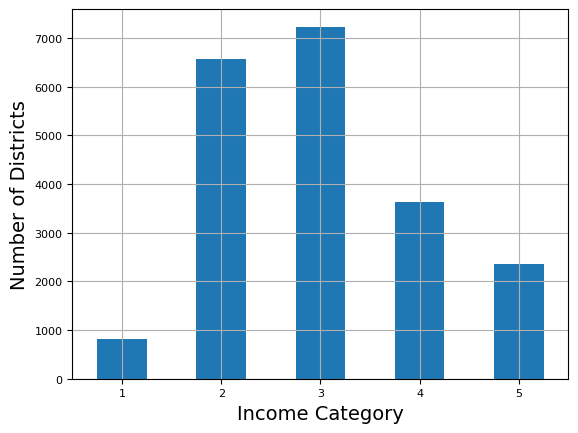

In [59]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot = 0, grid = True)
# housing["income_cat"].hist() also works
plt.xlabel("Income Category")
plt.ylabel("Number of Districts")
plt.show()

Next, we'll use the ``StratifiedShuffleSplit`` function. This generates a "splitter", which in turn creates stratified samples of our dataset. We can verify it by printing the ratio of each sample based on ``income_cat``:

In [110]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 42)
strat_splits = []
for train_idx, test_idx in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_idx]
    strat_test_set_n = housing.iloc[test_idx]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

strat_train_set, strat_test_set = strat_splits[0] # Can use other indices (there are n_splits different folds)

# We can do this more easily and without using StratifiedShuffleSplit, since tts has a nice argument stratify: 
strat_train_set, strat_test_set = train_test_split(housing, test_size = 0.2, stratify = housing["income_cat"])

print(f"Stratified test set:\n{strat_test_set['income_cat'].value_counts(normalize = True)}")
#print(strat_train_set["income_cat"].value_counts(normalize = True))

print(f"Full dataset:\n{housing['income_cat'].value_counts(normalize = True)}") # Roughly the same

# For the sake of comparison: see how a normal train_test_split behaves

normal_train_set, normal_test_set = train_test_split(housing, test_size = 0.2, random_state = 42)
print(f"Using train_test_split without stratify:\n{normal_test_set['income_cat'].value_counts(normalize = True)}")


Stratified test set:
income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: proportion, dtype: float64
Full dataset:
income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: proportion, dtype: float64
Using train_test_split without stratify:
income_cat
3    0.345203
2    0.307413
4    0.184109
5    0.120882
1    0.042393
Name: proportion, dtype: float64


Below is the comparison table.

In [111]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts(normalize = True)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(normal_test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


Don't forget to drop ``income_cat`` afterwards to return the datasets to their original forms.

In [112]:
for set_ in (strat_train_set, strat_test_set):
    set_ = set_.drop("income_cat", axis = 1)

### Data Visualization

## Annex 1. About stratification (Optional)

To find the probability that a random sample of 1,000 people contains less than 48.5% female or more than 53.5% female when the population's female ratio is 51.1%, we use the binomial distribution. The ``cdf()`` method of the binomial distribution gives us the probability that the number of females will be equal or less than the given value.

In [113]:
from scipy.stats import binom

sample_size = 1000
ratio_f = 0.511
p_small = binom(sample_size, ratio_f).cdf(485 - 1)
p_large = 1 - binom(sample_size, ratio_f).cdf(535)
print(f"p_total = {p_small + p_large}")

p_total = 0.10736798530929942


We can also get an estimate using simulation:

In [114]:
samples =  (np.random.rand(100_000, sample_size) < ratio_f).sum(axis = 1)
print(((samples < 485) | (samples > 535)).mean())

0.10789
